## Unsupervised dimensionality reduction via principal component analysis
- Similar to **feature selection**, we can use ** feature extraction** to reduce the number of features in a dataset.
- Feature extraction is used to improve computational efficiency but can also help to reduce the **curse of dimensionality**

### Principal Component Analysis (PCA)
- An unsupervised linear transformation technique that is widely used across different fields, most prominently for dimensionality reduction
- Other popular applications of PCA:
    - Exploratory data analyses and de-noising of signals in stock market trading
    - Analysis of genome data and gene expression levels
    - Identify patterns in data based on correlation between features.
    
- In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.
![alt text](pca.JPG)

PCA explained with Wine Dataset

In [1]:
import pandas as pd

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      header=None)

In [6]:
# Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [7]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

In [10]:
sc = StandardScaler()

In [11]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

**COnstructing the covariance matrix**
- The symmetric dxd dimensional covariance matrix, where d is the number of dimensions in the dataset, stores the pairwise covariances between the different features.
- The covariance between two features $x_{j}$ and $x_{k}$ is given by:
$${\color{Blue} \sigma _{jk} = \frac{1}{n}\sum_{i=1}^{n}\left (x_{j}^{(i)}-\mu _{j} \right)\left (x_{k}^{(i)}-\mu _{k} \right)}$$
- The sample means are zero after standardization
- Positive covariance indicates that the features increase or decrease together
- Negative covariance indicates that the features vary in opposite directions.
- $\sum $ stands for the covariance matrix and not the sum.
- For e.g, a covariance matrix of three features would like
$$\Sigma = \begin{bmatrix}
 \sigma _{1}^{1} & \sigma _{12}  & \sigma _{13} \\
 \sigma _{21} & \sigma _{2}^{2} & \sigma _{23} \\ 
 \sigma _{31} & \sigma _{32} & \sigma _{3}^{3}
\end{bmatrix}$$
- **The Eigenvectors represent the Principal Components.**
- **The Eigenvalues define their magnitude.**
- In the case of the Wine dataset, we get **13 eigenvectors** and **eigenvalues** from the 13x13 covariance matrix
- Eigenvalue v satisfies:
$$\Sigma \textbf{v}= \lambda \textbf{v}$$

In [13]:
cov_mat = np.cov(X_train_std.T)

In [14]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [19]:
print 'Eigen Values:\n\n', eigen_vals

Eigen Values:

[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [20]:
print 'Eigen Vectors:\n\n', eigen_vecs

Eigen Vectors:

[[  1.46698114e-01   5.04170789e-01  -1.17235150e-01   2.06254611e-01
   -1.87815947e-01  -1.48851318e-01  -1.79263662e-01  -5.54687162e-02
   -4.03054922e-01  -4.17197583e-01   2.75660860e-01   4.03567189e-01
    4.13320786e-04]
 [ -2.42245536e-01   2.42168894e-01   1.49946576e-01   1.30489298e-01
    5.68639776e-01  -2.69052764e-01  -5.92636731e-01   3.32731614e-02
   -1.01833706e-01   2.17101488e-01  -8.13845005e-02  -1.52474999e-01
   -8.78560762e-02]
 [ -2.99344215e-02   2.86984836e-01   6.56394387e-01   1.51536318e-02
   -2.99209426e-01  -9.33386061e-02   6.07334578e-02  -1.00618575e-01
    3.51841423e-01   1.28549846e-01  -1.29751275e-02   1.68376064e-01
   -4.52518598e-01]
 [ -2.55190023e-01  -6.46871827e-02   5.84282337e-01  -9.04220851e-02
   -4.12499478e-02  -1.01342392e-01   2.50323869e-01   5.61658566e-02
   -5.00457282e-01   4.73344124e-02   9.89088030e-02  -6.70902926e-02
    4.86169765e-01]
 [  1.20797723e-01   2.29953850e-01   8.22627466e-02  -8.3912834

**Variance Explained Ratio for each of the EigenValues is given by:**
$$\frac{\lambda _{j}}{\sum_{j=1}^{d}\lambda_{j}}$$

In [21]:
tot = sum(eigen_vals)

In [22]:
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

In [23]:
cum_var_exp = np.cumsum(var_exp)

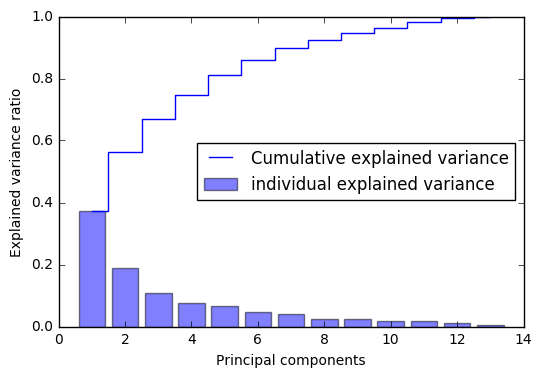

In [24]:
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', 
        label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [25]:
import seaborn as sns


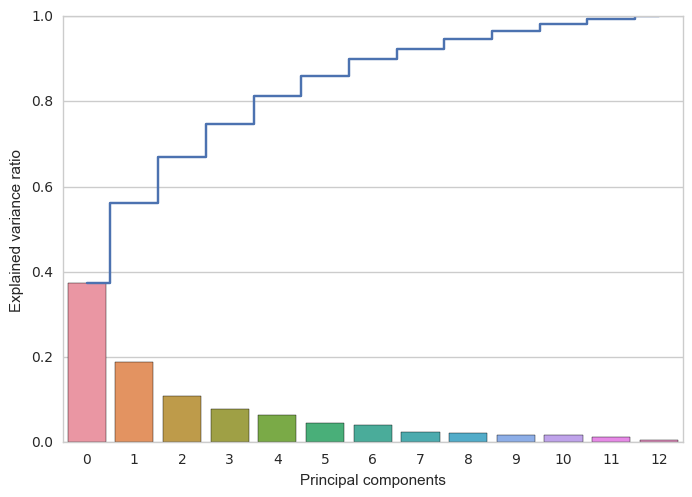

In [46]:
sns.set_style("whitegrid")
ax = sns.barplot(x=range(0,13), y=var_exp,)
ax.step(x=range(0,13), y=cum_var_exp, where='mid')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')